# Assignment 1

# 1. Regression

The goal of this part of assignment is to apply regression analysis using splines and advanced decision tree regression techniques on a real-world dataset. You will explore the dataset, preprocess it, apply different regression models, and compare their performance.

## Dataset
For this assignment, we will use the "California Housing Prices" dataset from the `sklearn.datasets` module for ease of access. 

## Tasks

### 1. Data Exploration and Preprocessing
- Load the California Housing Prices dataset.
- [Perform exploratory data analysis (EDA) to understand the dataset](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15).
- Visualize the distribution of the target variable and other features (plotting a histogram or a density plot of the target variable to see its distribution. This can reveal if the target is normally distributed, skewed, or has any unusual patterns.)
- Handle missing values if any (for now you can remove the observation).
- Normalize/standardize the features if required.



In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 


# Load the dataset
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
df.shape


(20640, 9)

In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [2]:
missing_values = df.isnull().sum()
missing_values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [3]:
# Separating features and target
features = df.drop('MedHouseVal', axis=1)
target = df['MedHouseVal']

# Normalizing/Standardizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)


In [9]:
sns.histplot?

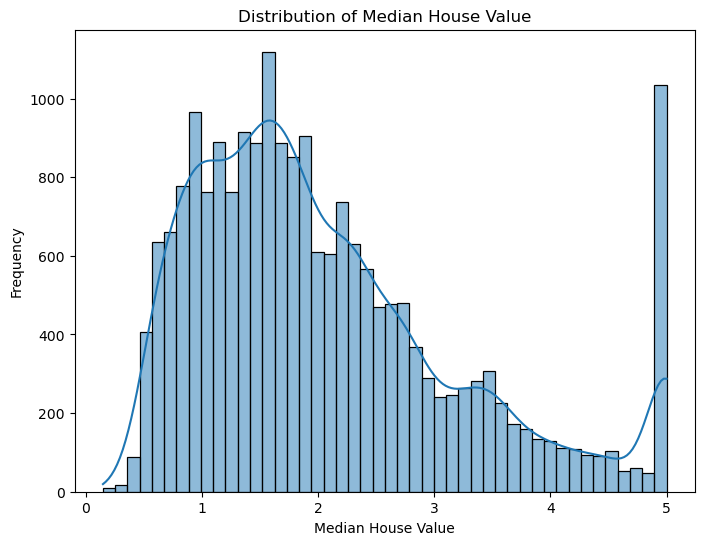

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(target, kde=True) # kde:kernel density estimate to smooth the distribution
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

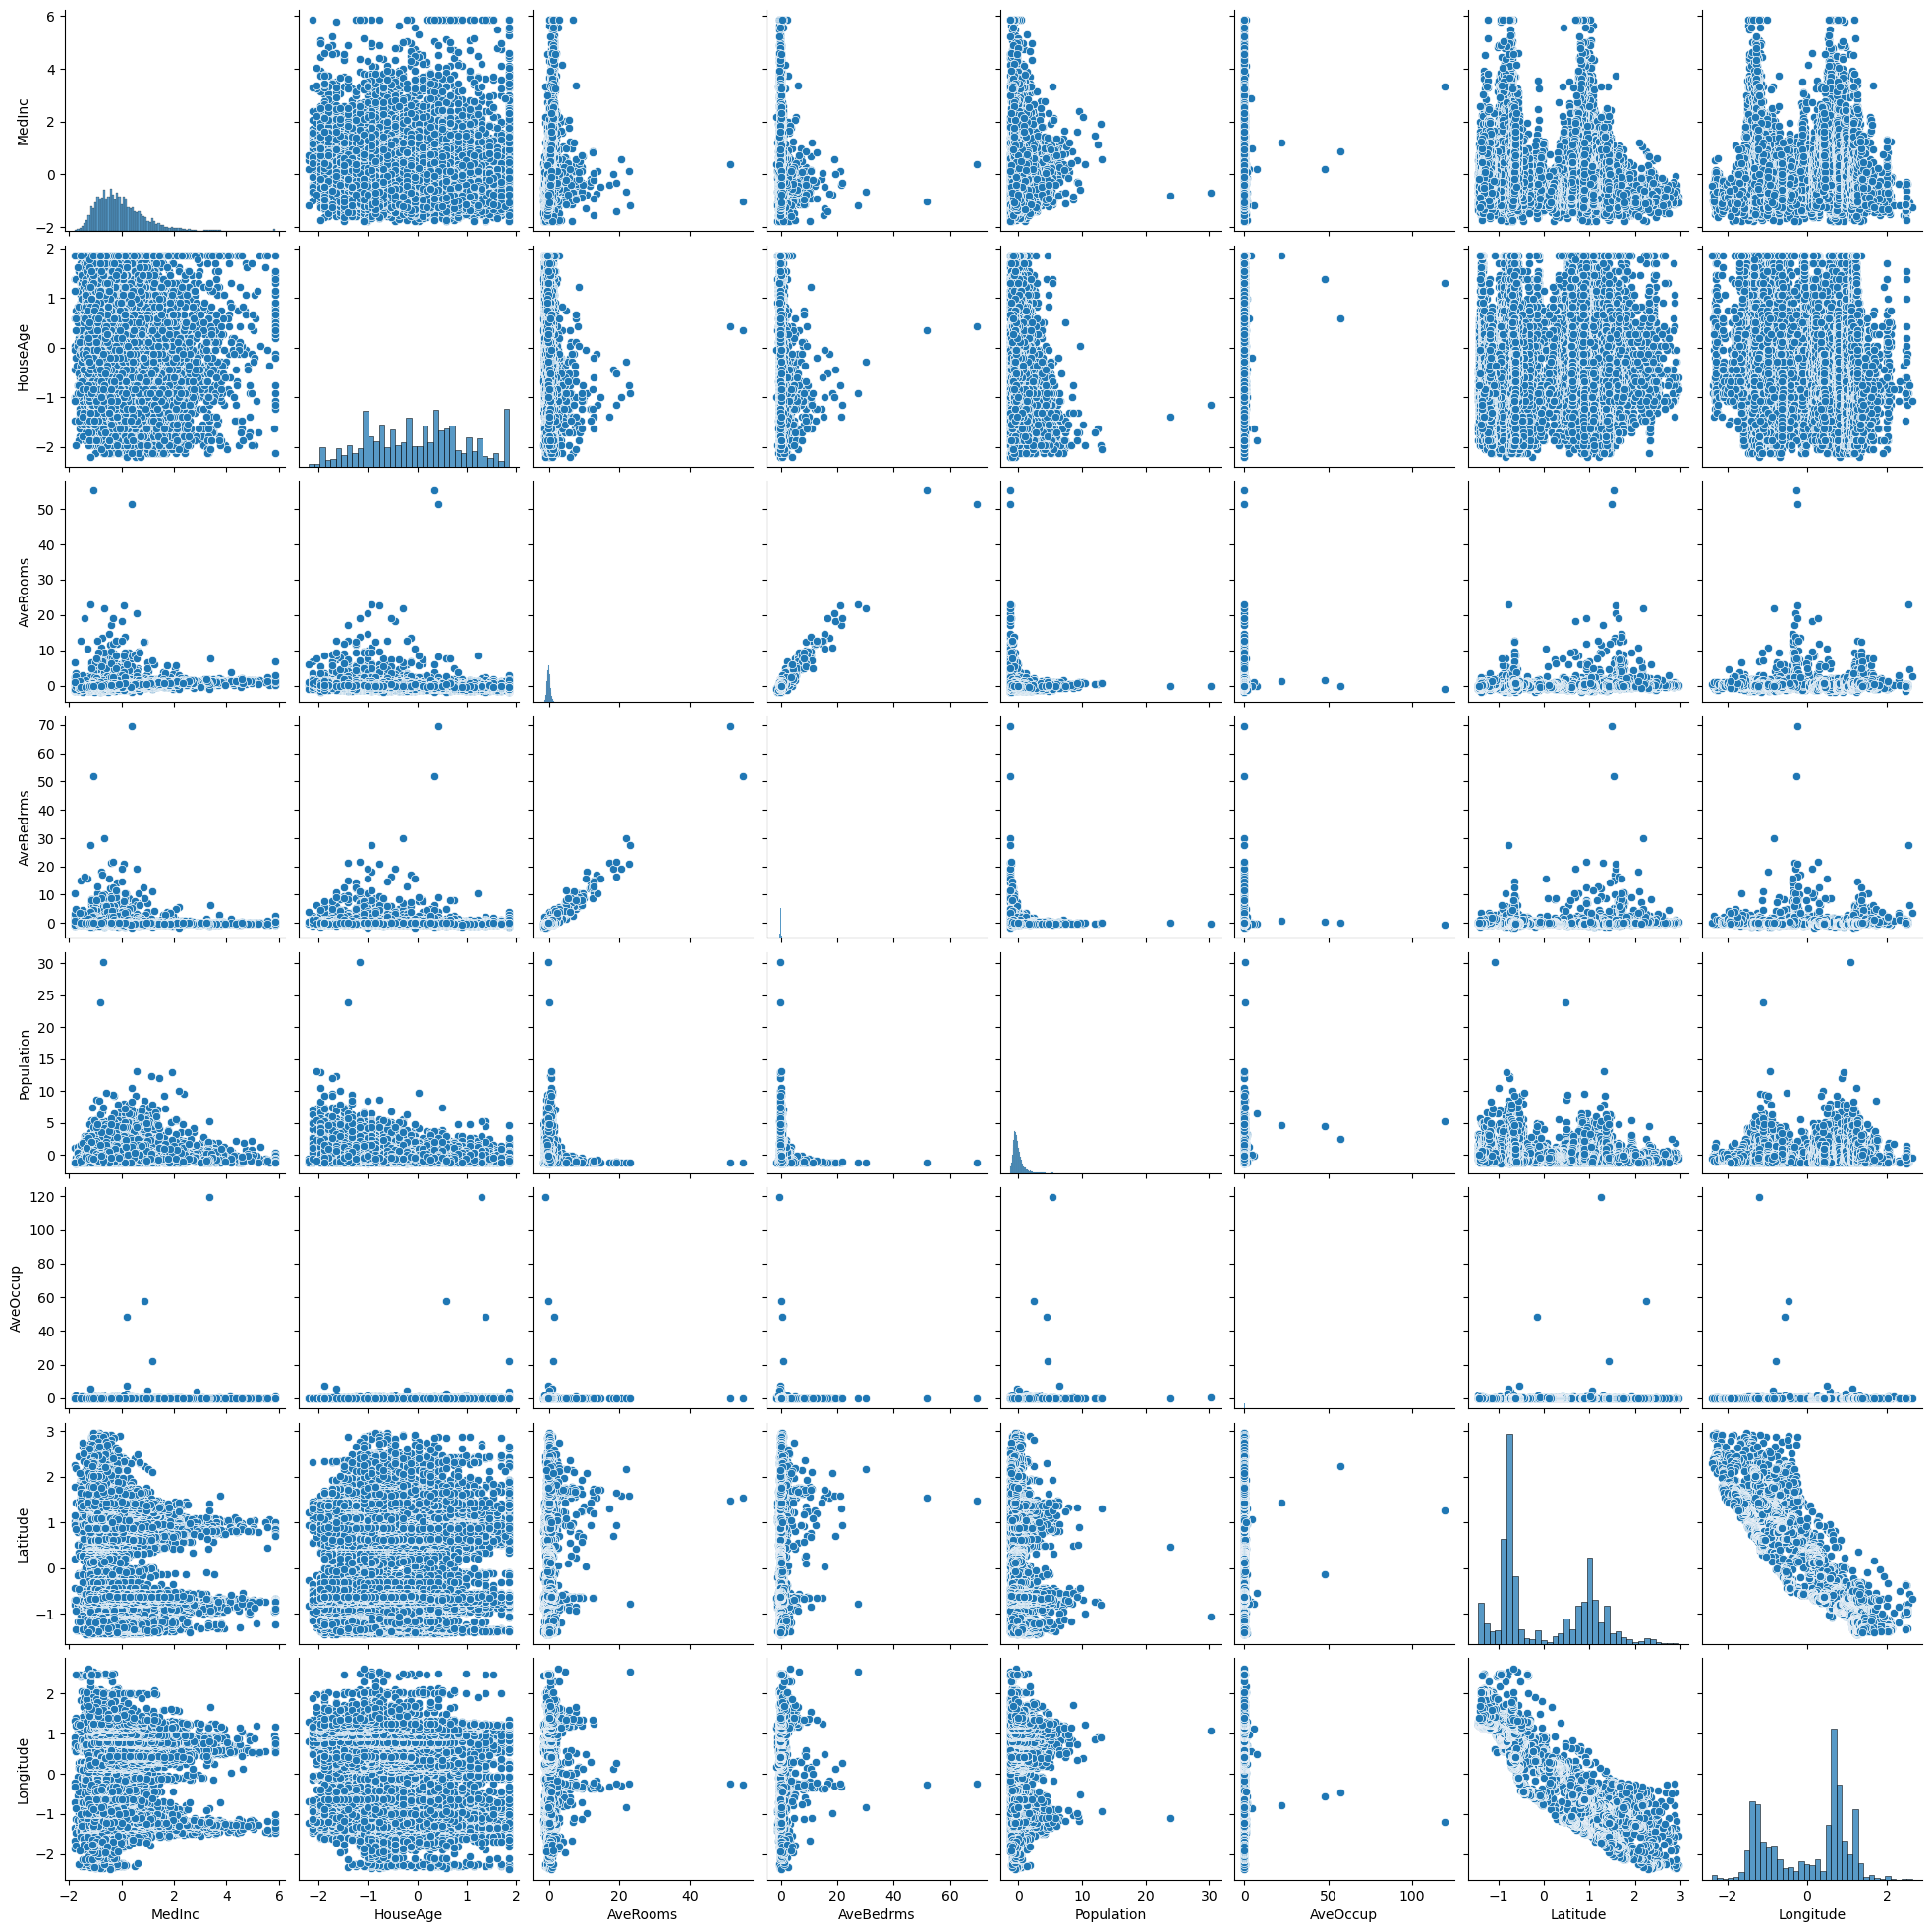

In [7]:
sns.pairplot(data=scaled_features_df, kind="scatter");

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)


### 2. Regression with Splines
- Fit a spline model to the data. You may use the `patsy` library in Python for creating spline features.
- Experiment with different degrees of freedom to see how the model complexity affects the performance.
- Evaluate the model using appropriate metrics (e.g., RMSE, R²).


# Splines recap
### B-splines

* B-splines, or basis splines, are defined using a set of **control points** and a **knot vector**. 
* They can be of any degree.
* The term 'B-spline' itself doesn't imply a specific degree; instead, it refers to a series of **basis functions** that make up the spline. B-splines offer great flexibility in shaping the curve, especially through manipulation of knots and control points. 
* In B-splines, the control points influence the shape of the curve but the curve does **not necessarily pass through control points**. The placement of knots (which are parameters that define how the spline bends) significantly affects the shape of the B-spline, allowing for local control of the curve.

* A B-spline basis function of degree $ p$ is defined recursively in terms of B-spline basis functions of degree $p-1$. The recursion commences with the zeroth-degree B-spline basis functions, defined as follows:

   $$B_{i,0}(x) = \begin{cases}
      1 & \text{if } t_i \leq x < t_{i+1}\\
      0 & \text{otherwise}
    \end{cases}
    $$ where, $ t_i$ and $t_{i+1} $ are given **knots** and sorted into nondecreasing order.

* B-spline basis functions of higher degree are defined using the recursive formula below:$$
B_{i,p}(x) = \frac{x - t_i}{t_{i+p} - t_i} B_{i,p-1}(x) + \frac{t_{i+p+1} - x}{t_{i+p+1} - t_{i+1}} B_{i+1,p-1}(x)
$$

* B-spline basis functions are employed to construct B-spline curves and surfaces. A B-spline curve is articulated as a linear combination of B-spline basis functions:$$
C(x) = \sum_{i=0}^n c_i B_{i,p}(x)
$$

* The coefficients $c_i$ in this equation are related to the control points, but they are not the direct coordinates of these points. Instead, each coefficient is a weighted sum involving several control points. The specific relationship depends on the degree of the B-spline and the arrangement of the knots.


* They provide **local control** over the shape of the curve. 

B-spline of degree 1 |  B-spline of degree 2
:-------------------------:|:-------------------------:
![](bspline_d1.png)  |  ![](bspline_d2.png)
B-spline of degree 3 |  B-spline of degree 3 change Control point
![](bspline_d3.png)  |  ![](bspline_d3c.png)

# Splines recap
### Natural Cubic Spline

* They are piecewise cubic polynomials and are characterized by their **smoothness and linearity** outside the range of the data.

* A natural cubic spline with $ k $ knots divides the data into $ k+1$ regions, fitting a cubic polynomial in each region.

* At each knot, the spline is continuous and has continuous first and second derivatives, ensuring smooth transitions between polynomials. --> 3 conditions

* The function is linear beyond the boundary knots (first and last knots), making the second derivative zero outside the knots' range. --> another condition

A natural cubic spline $ S(x) $ for a variable $ x $ is represented as follows:

$$
S(x) = 
\begin{cases} 
      S_1(x) & \text{if } x < k_1 \\
      S_2(x) & \text{if } k_1 \leq x < k_2 \\
      \quad \vdots \\
      S_{k+1}(x) & \text{if } x \geq k_k 
\end{cases}
$$

Where each $ S_i(x) $ is a cubic polynomial $S_i(x) = a_i + b_i x + c_i x^2 + d_i x^3 $, and $ k_1, k_2, \ldots, k_k$ are the knots. The coefficients $ a_i, b_i, c_i, $ and $ d_i $ are determined by continuity, smoothness, and natural spline conditions:

- Continuity: $ S_i(k_i) = S_{i+1}(k_i) $ for all $ i $.
- Smoothness: The first and second derivatives of $ S_i(x)$ and $ S_{i+1}(x) $ match at each knot $ k_i $.
- Natural Conditions: The second derivatives at the endpoints are zero.


* Cubic splines are often used for **interpolation**, where the spline is required to pass through each control point exactly.
* The term "cubic spline" typically refers to a specific kind of spline of degree three with certain continuity conditions.
* Adjustments to a segment of a cubic spline (changing a control point) can have a more **global impact** on the shape of the entire curve.




### What is happening in the code:

* **Applying Splines to Each Feature:** For each feature in the dataset, a spline function is applied to capture its non-linear relationship with the response variable. This results in a transformed version of each feature.

* **Combining Transformed Features:** After transforming each feature with a spline, the next step is to combine these transformed features. In a simple additive approach, the spline-transformed features are summed together, with intercept and coefficients for each spline-transformed feature. This is similar to a linear regression model but with **non-linear transformations applied to the inputs**.$$
Y = \beta_0 + \beta_1 f_1(X_1) + \cdots + \beta_n f_n(X_n) + \epsilon
$$where $f_i(X_i)$  is the spline transformation of the $i$ feature.

* **Response Prediction:** For each individual data point, the response is predicted by evaluating these combined spline-transformed features using the model. In an additive model, this simply involves **summing the contributions of each transformed feature** as specified by the model.



In [14]:
from patsy import dmatrix

dataF = pd.DataFrame({
    'height': [10, 20, 30, 40, 50],
    'weight': [88, 99, 125, 155, 120],
    'y': [50, 60, 70, 80, 90]
})

formula = "cr(height + weight, knots = [100,160])" # cr(): Natural cubic regression splines 
transformed_x = dmatrix(formula, data=dataF, return_type='dataframe')

display(transformed_x)


model = LinearRegression()
model.fit(transformed_x,dataF['y'])

y_pred = model.predict(transformed_x)

mean_squared_error(dataF['y'], y_pred)

,Intercept,"cr(height + weight, knots=[100, 160])[0]","cr(height + weight, knots=[100, 160])[1]","cr(height + weight, knots=[100, 160])[2]","cr(height + weight, knots=[100, 160])[3]"
0,1.0,1.000000,0.000000,0.000000,0.000000
1,1.0,-4.699628,5.499114,0.269948,-0.069433
2,1.0,-0.625731,0.690273,1.003427,-0.067969
3,1.0,0.000000,0.000000,0.000000,1.000000
4,1.0,0.644145,-0.709991,0.856202,0.209644


27.276237728275078

### How to set knots and df:

* **Degrees of Freedom (df)**: This is the number of parameters in the model. For spline models, this includes the coefficients of the spline basis functions.

* **Degree of the Spline**: This refers to the degree of the polynomial pieces of the spline. A cubic spline has a degree of 3. You should define this when using `bs()`, B-splines in Patsy, but for `cr()` and `cc()` it is $3$ since they are cubic.

* **Number of Knots:** Knots are points where the polynomial pieces of the spline join. They add flexibility to the spline at specific points.


For a cubic B-spline (degree=3) with an intercept, the number of degrees of freedom is calculated as the number of knots plus the degree of the spline plus 1 for the intercept. So, if you specify `df=4`, `degree=3`, and include_intercept=True, it implies that there should be no internal knots (0 knots).

$$\text{number of knots}=\text{df}-\text{degree}-1$$

In [220]:
import ipywidgets as widgets
from IPython.display import display

# Generate synthetic data
np.random.seed(0)
x = np.sort(np.random.uniform(0, 10, size=150))
y = np.sin(x) + np.random.normal(0, 0.2, size=x.shape)

def plot_Bspline(df):
    # Calculate the number of knots based on df and spline degree
    degree = 1
    num_knots = df - degree - 1
    num_knots = min(max(num_knots, 1), len(x) - degree - 1)  # Ensure valid number of knots

    # knot locations
    knot_locs = np.linspace(min(x), max(x), num_knots + 2)[1:-1]

    # Build design matrix using Patsy for B-splines with specified knots
    transformed_x = dmatrix(f"bs(x, df={df}, knots={knot_locs.tolist()}, degree={degree}, include_intercept=True)", {"x": x})

    # Fit model using scikit-learn's LinearRegression
    model = LinearRegression().fit(transformed_x, y)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points')
    xs = np.linspace(0, 10, 1000)
    xs_transformed = dmatrix(f"bs(x, df={df}, knots={knot_locs.tolist()}, degree={degree}, include_intercept=True)", {"x": xs})
    plt.plot(xs, model.predict(xs_transformed), 'r', label='Spline fit')

    # Plotting the knots
    for knot in knot_locs:
        plt.axvline(x=knot, color='gray', linestyle='--', alpha=0.7)

    plt.title(f"B-spline with df={df}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Widgets
df_sliderB = widgets.IntSlider(value=5, min=3, max=30, step=1, description='Degrees of Freedom:')

uiB = widgets.VBox([df_sliderB])
outB = widgets.interactive_output(plot_Bspline, {'df': df_sliderB})

display(uiB, outB)


Output()

In [114]:
# Generate synthetic data
np.random.seed(0)
x = np.sort(np.random.uniform(0, 10, size=150))
y = np.sin(x) + np.random.normal(0, 0.2, size=x.shape)


def plot_Cspline(df):
    # Estimate knot locations (assuming they are placed at quantiles)
    # The number of internal knots is (df-4)/2
    num_internal_knots = max(df - 2, 1) # approximate 
    knot_locs = np.percentile(x, np.linspace(0, 100, num_internal_knots + 2)[1:-1])

    # Build design matrix using Patsy for natural cubic splines
    transformed_x = dmatrix(f"cr(x, df={df})", {"x": x})

    # Fit model using scikit-learn's LinearRegression
    model = LinearRegression().fit(transformed_x, y)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points')
    xs = np.linspace(0, 10, 1000)
    xs_transformed = dmatrix(f"cr(x, df={df})", {"x": xs})
    plt.plot(xs, model.predict(xs_transformed), 'r', label='Spline fit')

    # Plotting estimated knot locations
    for knot in knot_locs:
        plt.axvline(x=knot, color='gray', linestyle='--', alpha=0.7)

    plt.title(f"Natural Cubic Spline with df={df}")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Widgets
df_sliderC = widgets.IntSlider(value=3, min=3, max=12, step=1, description='Degrees of Freedom:')

uiC = widgets.VBox([df_sliderC])
outC = widgets.interactive_output(plot_Cspline, {'df': df_sliderC})

display(uiC, outC)


Output()

### Summary:

#### Continuity and Smoothness:
 * B-Splines: The degree of continuity and smoothness can be controlled through the choice of the degree of the spline and the arrangement of knots. Higher-degree B-splines can produce smoother curves.
 * Cubic Splines: They are generally smooth up to the second derivative. This inherent smoothness at the control points is a defining characteristic of cubic splines.
 
#### Applications:

* B-Splines: Widely used in computer graphics, CAD (Computer-Aided Design), and any application requiring a **high degree of curve control** and smoothness. They are favored for their stability and **local control** properties.

* Cubic Splines: Commonly used for **interpolation** problems where a smooth curve needs to pass through a given set of data points.



#### Back to the "California Housing Prices" regression

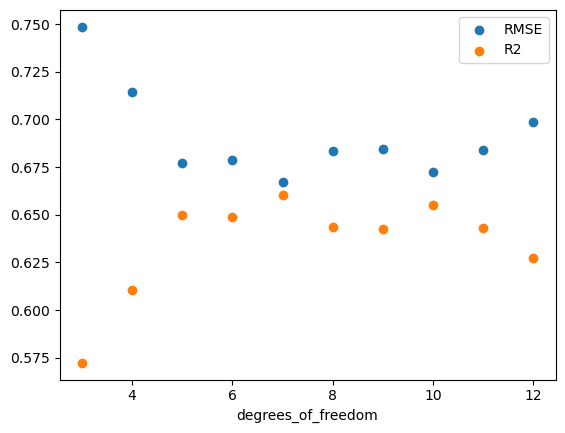

In [12]:
# Regression with Splines
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

feature_names = scaled_features_df.columns

# Experimenting with different degrees of freedom for the spline model
degrees_of_freedom = np.arange(3,13)
rmse =[]
r2=[]
for df in degrees_of_freedom:
    
    
    formula = ' + '.join([f"cr({feature}, df="+str(df)+")" for feature in feature_names])
    
    transformed_X_train = dmatrix(formula, data=X_train, return_type='dataframe')
    transformed_X_test = dmatrix(formula, data=X_test, return_type='dataframe')

     # Fit the model
    model = LinearRegression()
    model.fit(transformed_X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(transformed_X_test)

    # Evaluate the model
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2.append(r2_score(y_test, y_pred))
    

plt.scatter(degrees_of_freedom, rmse)
plt.scatter(degrees_of_freedom, r2)
plt.xlabel('degrees_of_freedom')
plt.legend(['RMSE' , 'R2'])
plt.show()


### 3. Regression with ensemble Decision Trees
- Apply Random Forest, AdaBoost and GradientBoosting regression techniques (from `sklearn`)
- For each method, tune hyperparameters using cross-validation.
- Evaluate the models using appropriate metrics (e.g., RMSE, R²).



Model:   Random Forest
{'n_estimators': [100, 200], 'max_depth': [10, 20]}


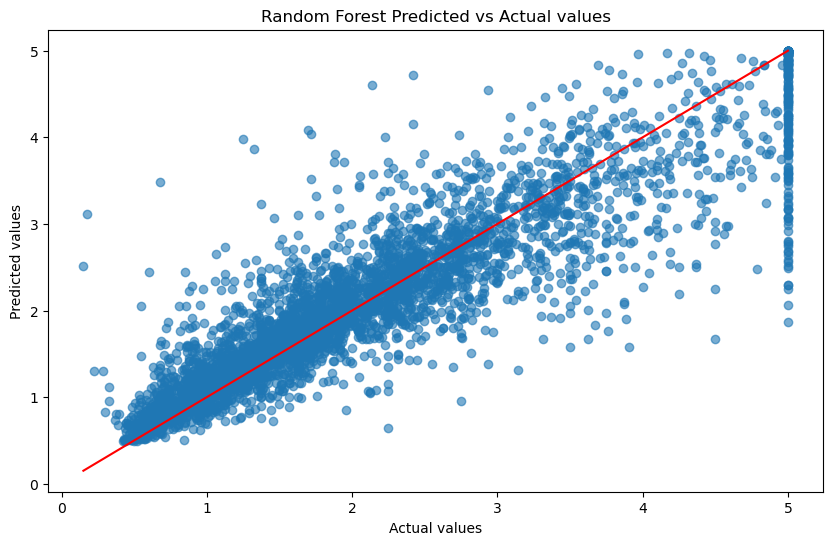

Model:   AdaBoost
{'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}


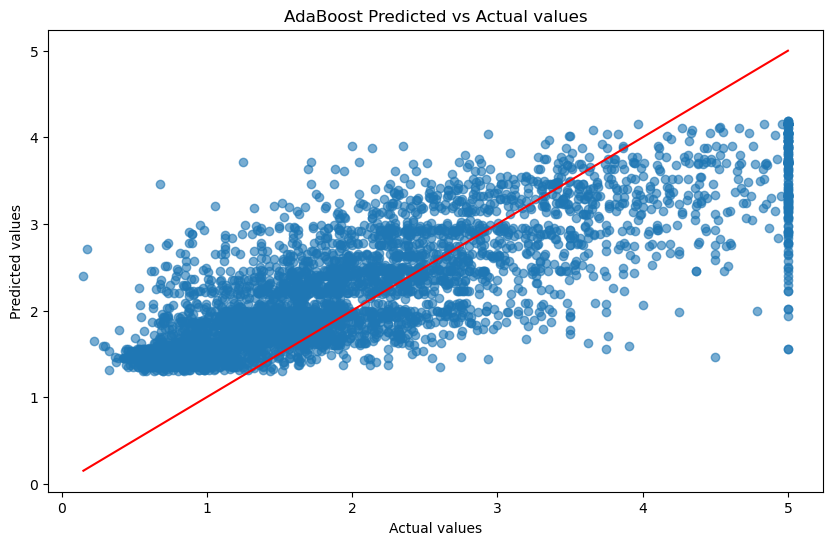

Model:   Gradient Boosting
{'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}


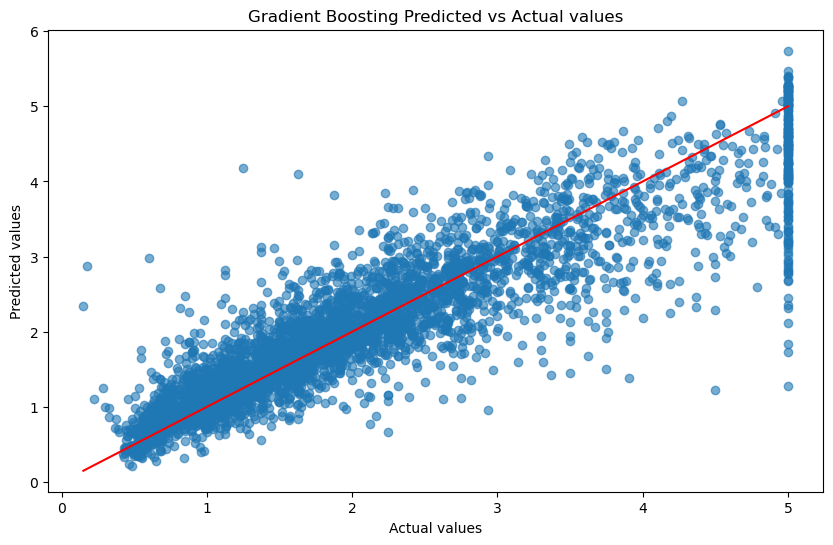

{'Random Forest': {'RMSE': 0.5048160712235051, 'R2': 0.8055269232757909, 'Best Params': {'n_estimators': 200, 'max_depth': 20}}, 'AdaBoost': {'RMSE': 0.7522341111205274, 'R2': 0.5681835462598108, 'Best Params': {'n_estimators': 100, 'learning_rate': 0.1}}, 'Gradient Boosting': {'RMSE': 0.5113702537480528, 'R2': 0.8004443339747364, 'Best Params': {'n_estimators': 200, 'learning_rate': 0.1}}}


In [13]:
%%time
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV



# Models to be used
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Hyperparameters for tuning
parameters = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]}, #number of trees in the forest and max depth
    "AdaBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

# Storing model performance
model_performance = {}

# Tuning hyperparameters and evaluating each model
for model_name in models:
    print('Model:  ', model_name)
    model = models[model_name]
    params = parameters[model_name]
    print(params)
    
    # Using GridSearchCV for hyperparameter tuning
    param_search = RandomizedSearchCV(estimator=model, param_distributions=params, cv=3, scoring='neg_mean_squared_error')
    param_search.fit(X_train, y_train)

    # Best model
    best_model = param_search.best_estimator_

    # If you wish to see the individual cross-validation scores
    #cv_scores = param_search.cv_results_
    #print('cv scores', cv_scores)
    # If you like to plot them read:
    ## https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html
    
    
    
    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store results
    model_performance[model_name] = {'RMSE': rmse, 
                                     'R2': r2,
                                     'Best Params': param_search.best_params_}

    # Visualization: Predicted vs Actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(f'{model_name} Predicted vs Actual values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
    plt.show()

# Output model performance
print(model_performance)



## Visualizing predicted vs. actual values


1. Accuracy of Predictions: The closer the points are to the diagonal line, the more accurate the predictions. Points far from the line indicate large discrepancies between predicted and actual values.
2. Under or Overestimation: If most points lie above the diagonal, the model tends to underestimate the actual values. Conversely, if they are below, it overestimates.
3. Variance in Predictions: A wide scatter of points indicates high variance in the model's predictions. In contrast, a narrow, tightly clustered scatter suggests low variance.
4. Model Bias: If the scatter of points systematically deviates from the diagonal line in certain ranges, it indicates the model has a bias in those areas.

5. Outliers and Extreme Values: Outliers are easily spotted as points that lie far from the cluster of other points.


### 4. Model Comparison
- Compare the performance of the spline models with the advanced decision tree regression models.
- Use visualizations to compare the predicted vs actual values for each model.
- Discuss the bias-variance tradeoff for each model based on your results.

### 5. Analysis and Discussion
- Discuss the performance of each model and the impact of hyperparameters on the outcome.

- Provide insights on which features are most important for predicting housing prices.



# 2. Classification
In this assignment, you will apply various classification techniques on a dataset to predict categorical outcomes. You will use Support Vector Machines (SVM), advanced decision tree classifiers, and Generalized Additive Models (GAMs) to build predictive models and compare their performance.

## Dataset
We will use the "Breast Cancer Wisconsin (Diagnostic)" dataset for this assignment. This dataset is included in the `sklearn.datasets` module.

## Tasks

### 1. Data Exploration and Preprocessing
* Begin by loading the dataset and conducting exploratory data analysis (EDA).
* Visualize the distribution of the classes (malignant and benign) and the features.
* Preprocess the data by handling missing values, encoding categorical variables if necessary, and scaling the features.

### 2. Classification with Support Vector Machines (SVM)
* Train an SVM classifier using the preprocessed data.
* Experiment with different kernels (linear, polynomial, and radial basis function) and regularization parameters.
* Evaluate the model using appropriate metrics (accuracy, precision, recall, F1-score, and ROC-AUC).




### 3. Classification with Advanced Decision Trees

* Apply advanced decision tree classification techniques such as Random Forest and Gradient Boosting.
* Tune hyperparameters with cross-validation.

* Evaluate the models using the same metrics as for SVM.

### 4. Classification with Generalized Additive Models (GAMs)

* Fit a GAM for classification using the `pyGAM` library.

* Select appropriate link functions and distribution families for the binary classification task.
* Visualize the contribution of each feature to the model using partial dependency plots.
* Evaluate the model using the same metrics as for SVM and decision trees.


### 5. Model Comparison and Analysis
* Compare the performance of SVM, advanced decision trees, and GAMs.
* Use confusion matrices and ROC curves to visualize the performance differences.
* Discuss the strengths and weaknesses of each model in the context of the dataset.


### 6. Conclusion
* Summarize the findings from the model comparisons.
* Provide insights into which model performed best and hypothesize why.
* Discuss any potential improvements or alternative approaches that could be explored.



## How to Submit
- First, a Jupyter Notebook containing all the code, comments, and analysis.
- Second report cells in the same Jupyter Notebook, summarizing your findings, including results and a discussion of the results.
- Finally convert the Jupyter Notebook to PDF.
- **Don't write your name**.
- Upload the PDF into convas.

## Evaluation Criteria (peer grading)
- Correctness of the implementation of all regression and classification models. (2 points)
- Quality of the EDA and preprocessing steps. (1 point)
- Depth of the analysis in comparing the models.(1 point)
- Clarity and organization of the submitted report and Jupyter Notebook. (1 point)

